# Kalman Filter

In [6]:
import numpy as np
import matplotlib.pyplot as plt

With the histogram filter we described the distribution using histograms. For the Kalman filter we use Gaussians.

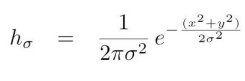

This is implemented in the code below:

In [7]:
# Define the Gaussian function
def gaussian(u, sigma2, x):
    """
    Calculate the Gaussian probability density function value for a given mean (u), variance (sigma2), and input (x).
    """
    coefficient = 1 / np.sqrt(2 * np.pi * sigma2)
    exponent = -0.5 * ((x - u) ** 2 / sigma2)
    return coefficient * np.exp(exponent)

# Given parameters for the two Gaussians
mean_1 = 4        # Mean for the first Gaussian
mean_2 = 20       # Mean for the second Gaussian
variance_1 = 40   # Variance for the first Gaussian
variance_2 = 4    # Variance for the second Gaussian    



# Exercise 2a
We have here plotted two distributions. The Kalman filter makes its measurement update by combining the information from these two gaussians. 

Plot the final Gaussian after the measurement update based on the two Gaussians plotted above. Use the following formulas to do so:

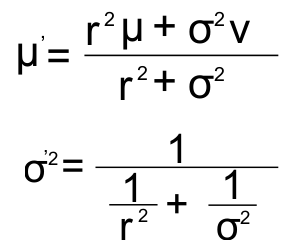

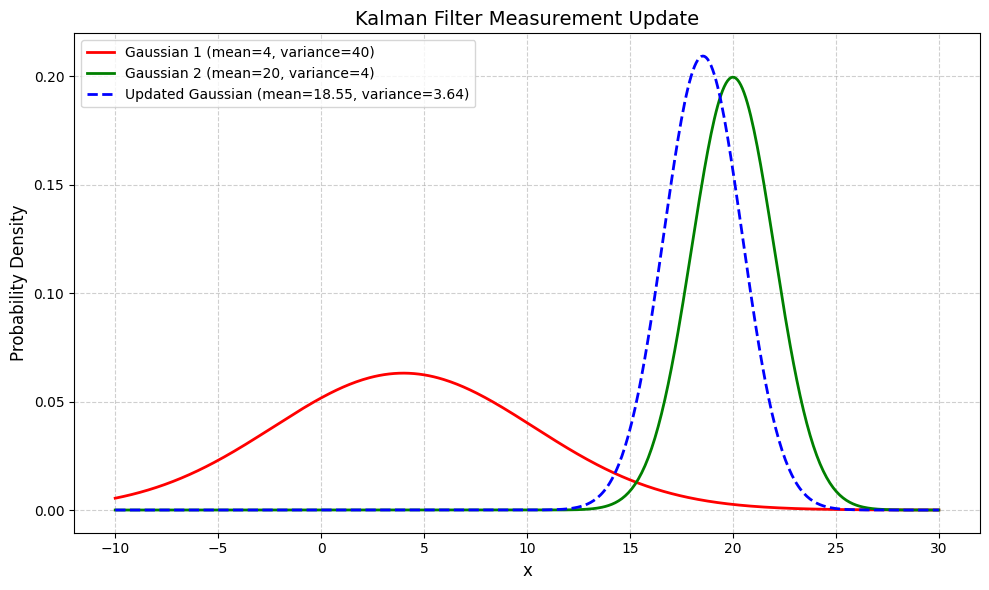

In [8]:
# Calculate the updated mean and variance using the Kalman filter equations
updated_mean = (variance_2 * mean_1 + variance_1 * mean_2) / (variance_2 + variance_1)
updated_variance = 1 / ((1 / variance_2) + (1 / variance_1))

# Generate x values for plotting
x_values = np.linspace(-10, 30, 500)

# Calculate Gaussian values for each distribution
y_values_1 = gaussian(mean_1, variance_1, x_values)
y_values_2 = gaussian(mean_2, variance_2, x_values)
y_values_updated = gaussian(updated_mean, updated_variance, x_values)

# Plot the original Gaussians and the updated Gaussian
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_1, color='red', linestyle='-', linewidth=2, label='Gaussian 1 (mean=4, variance=40)')
plt.plot(x_values, y_values_2, color='green', linestyle='-', linewidth=2, label='Gaussian 2 (mean=20, variance=4)')
plt.plot(x_values, y_values_updated, color='blue', linestyle='--', linewidth=2, label=f"Updated Gaussian (mean={updated_mean:.2f}, variance={updated_variance:.2f})")

# Improve plot aesthetics
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Kalman Filter Measurement Update', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Notice that the resulting Gaussian has a higher peak than both of the others. This means that combining the two Gaussians we get a result that has less uncertainty than either of the original Gaussians.



 
 
 






Next we have the prediction or motion update. This one is simply made by adding the motion to the Gaussian mean and the motion variance to the Gaussian variance:


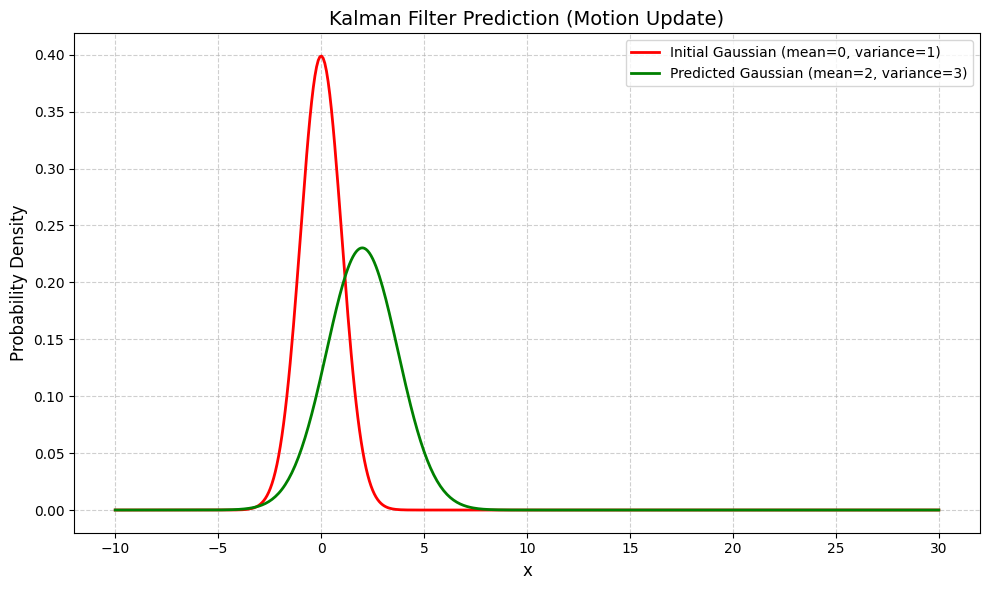

In [9]:
# Define the prediction function for the motion update
def predict(u1, s2_1, u2, s2_2):
    """
    Perform the prediction step by adding the motion to the Gaussian mean and the motion variance to the Gaussian variance.
    """
    u = u1 + u2
    s2 = s2_1 + s2_2
    return u, s2

# Initial state parameters
mean_initial = 0
variance_initial = 1

# Motion parameters
motion_mean = 2
motion_variance = 2

# Perform the prediction step
mean_pred, variance_pred = predict(mean_initial, variance_initial, motion_mean, motion_variance)

# Calculate Gaussian values for the initial and predicted distributions
y_values_initial = gaussian(mean_initial, variance_initial, x_values)
y_values_predicted = gaussian(mean_pred, variance_pred, x_values)

# Plot the initial and predicted Gaussians
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values_initial, color='red', linestyle='-', linewidth=2, label='Initial Gaussian (mean=0, variance=1)')
plt.plot(x_values, y_values_predicted, color='green', linestyle='-', linewidth=2, label=f"Predicted Gaussian (mean={mean_pred}, variance={variance_pred})")

# Improve plot aesthetics
plt.xlabel('x', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Kalman Filter Prediction (Motion Update)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Exercise 2b
Combine the update function you made in the previous exercise with the predict function given above and plot all the Gaussians calculated using the measurements and motions given in the code below:

IndexError: index 5 is out of bounds for axis 0 with size 5

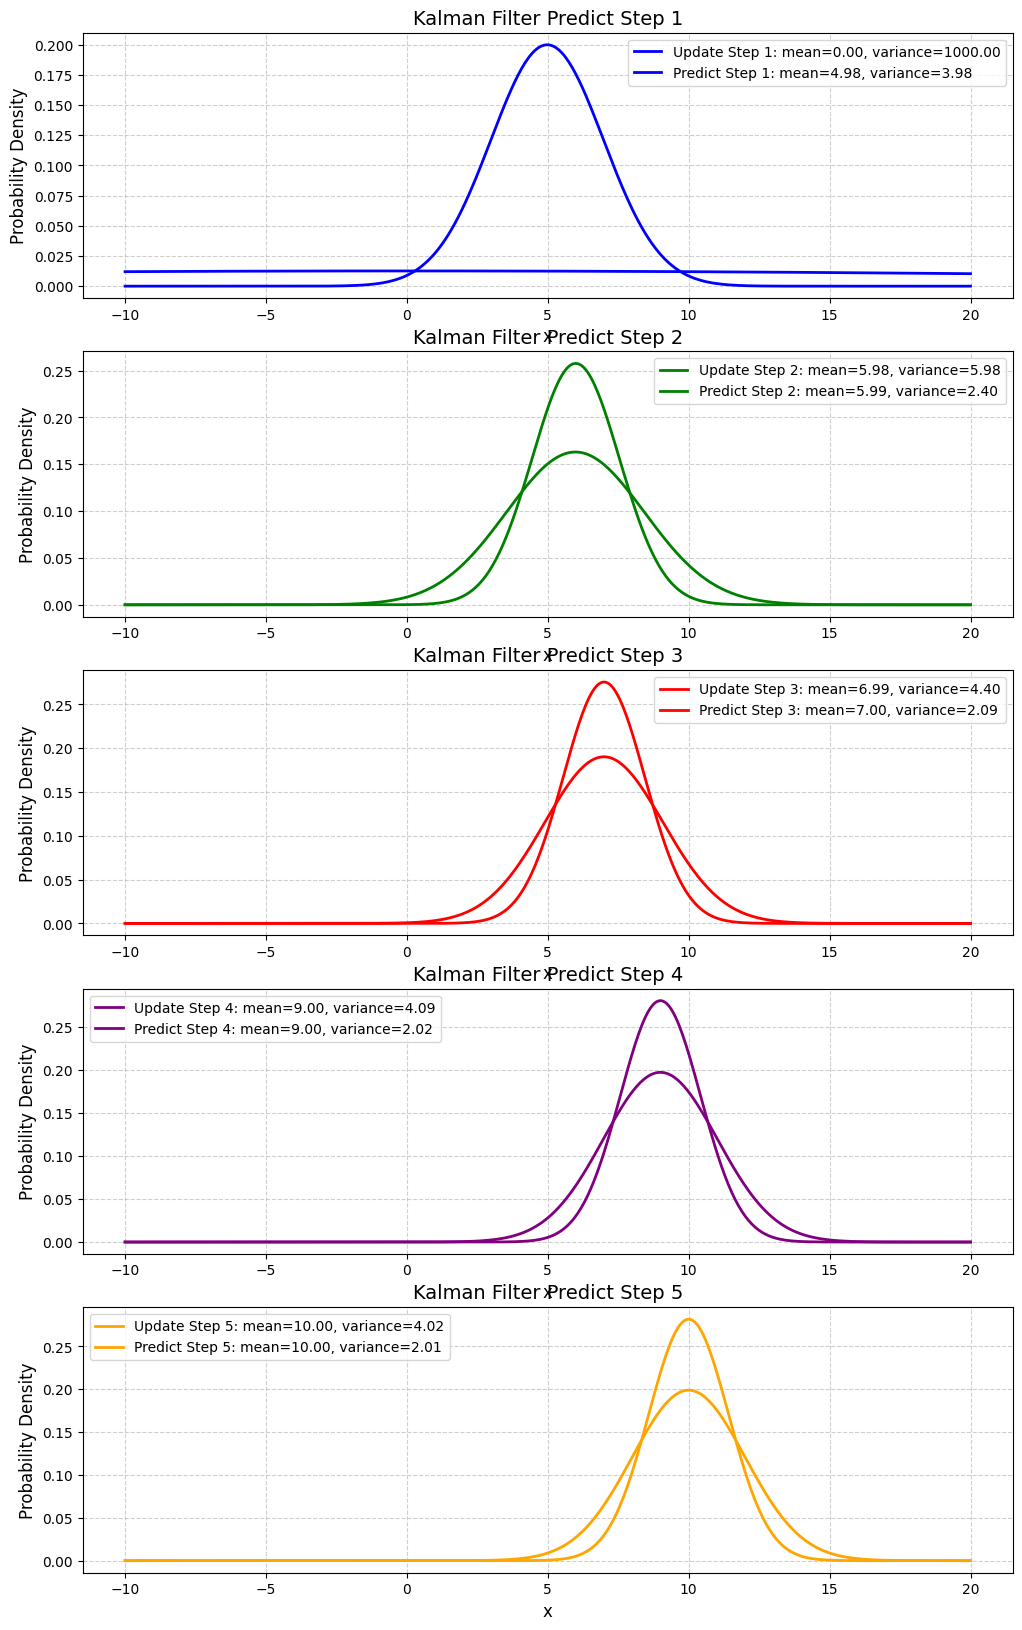

In [10]:
# Exercise 2b: Combine update and predict functions using given measurements and motions
measurements = [5, 6, 7, 9, 10]
measure_sigma = 4
motion = [1, 1, 2, 1, 1]
motion_sigma = 2

# Initial mean and variance
mean = 0
variance = 1000

# Lists to store results
means = [mean]
variances = [variance]

# Loop through the measurements and motions, applying update and predict
for i in range(len(measurements)):
    # Update step with measurement
    K = variance / (variance + measure_sigma)  # Kalman gain
    mean = mean + K * (measurements[i] - mean)
    variance = (1 - K) * variance

    # Store updated values
    means.append(mean)
    variances.append(variance)

    # Prediction step with motion
    mean = mean + motion[i]
    variance = variance + motion_sigma

    # Store predicted values
    means.append(mean)
    variances.append(variance)

# Generate x values for plotting
x_values = np.linspace(-10, 20, 500)

# Plot update and prediction steps in grouped plots to improve comparison
fig, axs = plt.subplots(5, 1, figsize=(12, 20))
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i in range(len(means)):
    ax = axs[i // 2]  # Group two plots (update and predict) in each subplot
    y_values = gaussian(means[i], variances[i], x_values)
    if i % 2 == 0:
        label_step = f"Update Step {i//2 + 1}: mean={means[i]:.2f}, variance={variances[i]:.2f}"
        title = f"Kalman Filter Update Step {i//2 + 1}"
    else:
        label_step = f"Predict Step {i//2 + 1}: mean={means[i]:.2f}, variance={variances[i]:.2f}"
        title = f"Kalman Filter Predict Step {i//2 + 1}"
    
    ax.plot(x_values, y_values, color=colors[i // 2], linewidth=2, label=label_step)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('Probability Density', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Exercise 2c

It's now time to look at the more general equations of the Kalman filter. We would like to apply a Kalman filter for a robot moving in 1D. We would like to track and predict its position and its velocity. 

A quick summary of the variables:

**x** : The state matrix. Holds the state of the robot, which is its position and velocity.

**P** : The uncertainty of the state.

**u** : The external motion. In this case there will not be an external motion affecting the robot.

**F** : The transition matrix (or next state function). Used to predict the next state of the robot.

**H** : The observation matrix (or measurement function). Used to update the robot state.

**R** : The measurement uncertainty. 

**I** : Identity matrix.

You will now have to implement your own update and predict function using the formulas given here. All the matrices are given in the code below. 

When you multiply matrices together you can use [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html). To get the inverse of a matrix, you can use [np.linalg.pinv](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html). To get the transpose you can use [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

The two equations written in black are the equations used for prediction and the rest are the equations used for updating.

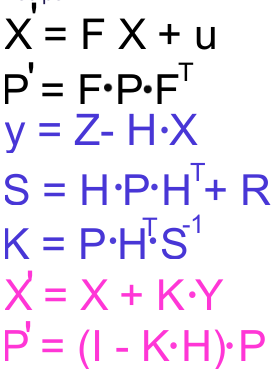

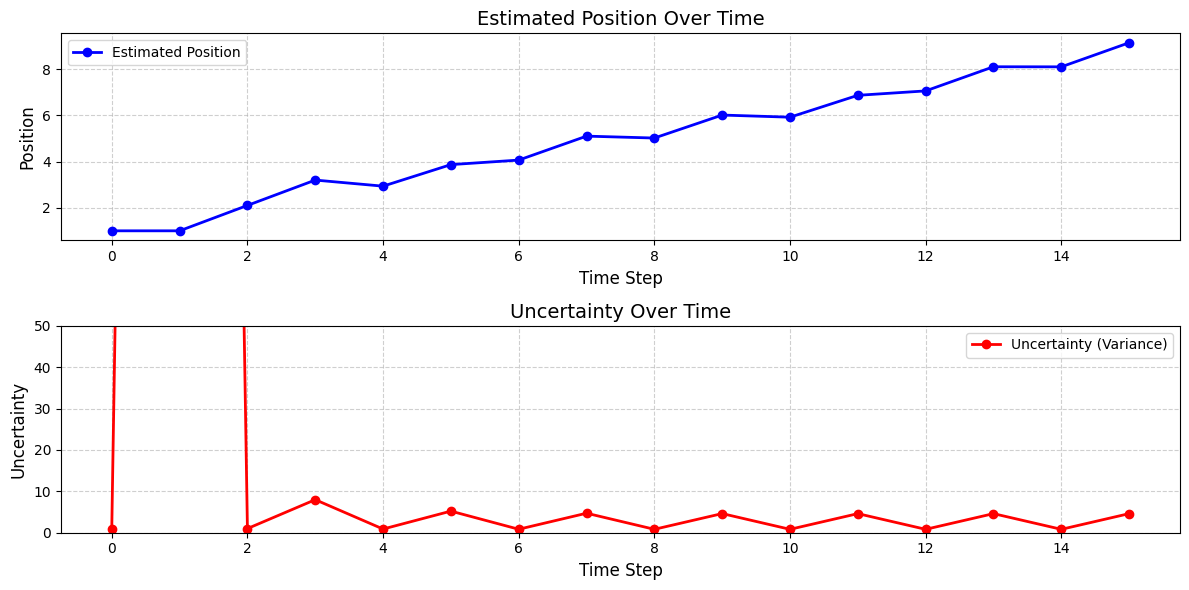

In [11]:
# Define the update function for the Kalman filter
def update(x, P, Z, H, R):
    """
    Perform the update step of the Kalman filter.
    x: The current state estimate.
    P: The current uncertainty covariance.
    Z: The measurement.
    H: The observation matrix.
    R: The measurement uncertainty.
    """
    y = Z - np.dot(H, x)  # Measurement residual
    S = np.dot(H, np.dot(P, H.T)) + R  # Residual covariance
    K = np.dot(P, np.dot(H.T, np.linalg.pinv(S)))  # Kalman gain
    x = x + np.dot(K, y)  # Updated state estimate
    P = np.dot((np.eye(len(P)) - np.dot(K, H)), P)  # Updated uncertainty covariance
    return x, P

# Define the predict function for the Kalman filter
def kalman_predict(x, P, F, u, Q):
    """
    Perform the predict step of the Kalman filter.
    x: The current state estimate.
    P: The current uncertainty covariance.
    F: The state transition matrix.
    u: The external motion (typically zero).
    Q: The process noise covariance matrix.
    """
    x = np.dot(F, x) + u
    P = np.dot(F, np.dot(P, F.T)) + Q  # Add process noise covariance
    return x, P

# The initial state. The robot starts in position 0 with velocity 0.
x = np.array([[0],
              [0]])

# The initial uncertainty. We start with some very large values.
P = np.array([[1000, 0],
              [0, 1000]])

# The external motion. Set to 0 here.
u = np.array([[0],
              [0]])

# The transition matrix.
F = np.array([[1, 1],
              [0, 1]])

# The observation matrix. We only get the position as measurement.
H = np.array([[1, 0]])

# The measurement uncertainty
R = 1

# The process noise covariance matrix (accounts for uncertainty in the model itself)
Q = np.array([[1, 0],
              [0, 1]])

# The identity matrix
I = np.array([[1, 0],
              [0, 1]])

# The measured positions
measurements = [1, 2.1, 2.9, 4.1, 5.0, 5.9, 7.1, 8.1]

# Loop through the measurements and apply the Kalman filter
estimated_positions = []
uncertainties = []

for measurement in measurements:
    # Update step
    x, P = update(x, P, measurement, H, R)
    estimated_positions.append(x[0, 0])
    uncertainties.append(P[0, 0])
    # Predict step
    x, P = kalman_predict(x, P, F, u, Q)
    estimated_positions.append(x[0, 0])
    uncertainties.append(P[0, 0])

# Plot the estimated positions and uncertainties
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(estimated_positions, color='blue', marker='o', linestyle='-', linewidth=2, label='Estimated Position')
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Position', fontsize=12)
plt.title('Estimated Position Over Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(2, 1, 2)
plt.plot(uncertainties, color='red', marker='o', linestyle='-', linewidth=2, label='Uncertainty (Variance)')
plt.ylim([0, 50])  # Adjusting the y-axis limit to improve visibility
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Uncertainty', fontsize=12)
plt.title('Uncertainty Over Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Notice how the uncertainty **P** gets smaller and the predicted states gets more accurate than the actual measurements.

# Exercise 2d
Extent the previous matrices such that the robot can move in 2D. The update and predict functions don't have to be changed, only the matrices. For example the state matrix will now have to hold both the position and velocity in both the x- and y-direction: 


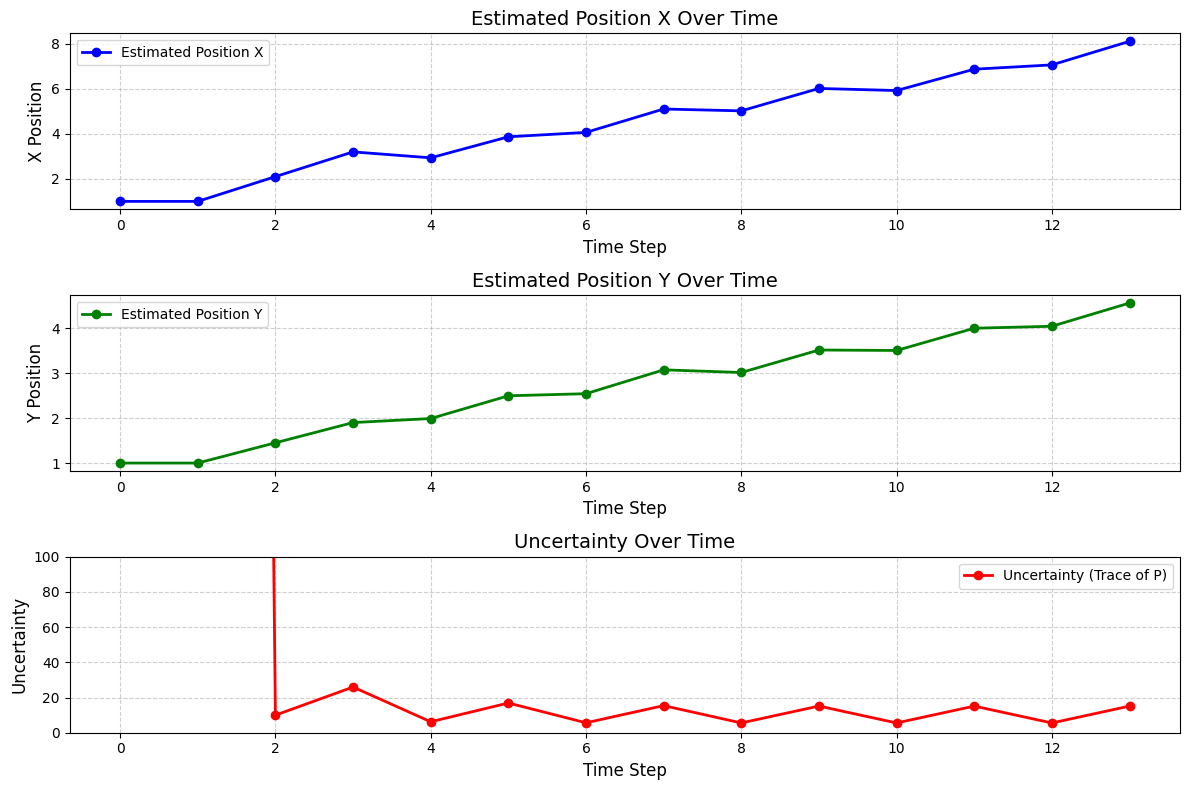

In [12]:
# Define the update function for the Kalman filter
def update(x, P, Z, H, R):
    """
    Perform the update step of the Kalman filter.
    x: The current state estimate.
    P: The current uncertainty covariance.
    Z: The measurement.
    H: The observation matrix.
    R: The measurement uncertainty.
    """
    y = Z - np.dot(H, x)  # Measurement residual
    S = np.dot(H, np.dot(P, H.T)) + R  # Residual covariance
    K = np.dot(P, np.dot(H.T, np.linalg.pinv(S)))  # Kalman gain
    x = x + np.dot(K, y)  # Updated state estimate
    P = np.dot((np.eye(len(P)) - np.dot(K, H)), P)  # Updated uncertainty covariance
    return x, P

# Define the predict function for the Kalman filter
def kalman_predict(x, P, F, u, Q):
    """
    Perform the predict step of the Kalman filter.
    x: The current state estimate.
    P: The current uncertainty covariance.
    F: The state transition matrix.
    u: The external motion (typically zero).
    Q: The process noise covariance matrix.
    """
    x = np.dot(F, x) + u
    P = np.dot(F, np.dot(P, F.T)) + Q  # Add process noise covariance
    return x, P

# The initial state. The robot starts in position 0 with velocity 0 in both x and y directions.
x = np.array([[0],  # Position along the x-axis
              [0],  # Velocity along the x-axis
              [0],  # Position along the y-axis
              [0]]) # Velocity along the y-axis

# The initial uncertainty. We start with some very large values.
P = np.array([[1000, 0, 0, 0],
              [0, 1000, 0, 0],
              [0, 0, 1000, 0],
              [0, 0, 0, 1000]])

# The external motion. Set to 0 here.
u = np.array([[0],
              [0],
              [0],
              [0]])

# The transition matrix for 2D movement.
F = np.array([[1, 1, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 1],
              [0, 0, 0, 1]])

# The observation matrix. We only get the position as measurement (both x and y positions).
H = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])

# The measurement uncertainty
R = np.array([[1, 0],
              [0, 1]])

# The process noise covariance matrix (accounts for uncertainty in the model itself)
Q = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

# The identity matrix
I = np.eye(4)

# The measured positions
measurements_x = [1, 2.1, 2.9, 4.1, 5.0, 5.9, 7.1]
measurements_y = [1, 1.45, 2.0, 2.55, 3, 3.5, 4.05]

# Loop through the measurements and apply the Kalman filter
estimated_positions_x = []
estimated_positions_y = []
uncertainties = []

for i in range(len(measurements_x)):
    # Measurement update
    z = np.array([[measurements_x[i]],
                  [measurements_y[i]]])
    x, P = update(x, P, z, H, R)
    estimated_positions_x.append(x[0, 0])
    estimated_positions_y.append(x[2, 0])
    uncertainties.append(np.trace(P))
    # Predict step
    x, P = kalman_predict(x, P, F, u, Q)
    estimated_positions_x.append(x[0, 0])
    estimated_positions_y.append(x[2, 0])
    uncertainties.append(np.trace(P))

# Plot the estimated positions and uncertainties
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(estimated_positions_x, color='blue', marker='o', linestyle='-', linewidth=2, label='Estimated Position X')
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('X Position', fontsize=12)
plt.title('Estimated Position X Over Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(3, 1, 2)
plt.plot(estimated_positions_y, color='green', marker='o', linestyle='-', linewidth=2, label='Estimated Position Y')
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Y Position', fontsize=12)
plt.title('Estimated Position Y Over Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(3, 1, 3)
plt.plot(uncertainties, color='red', marker='o', linestyle='-', linewidth=2, label='Uncertainty (Trace of P)')
plt.ylim([0, 100])  # Adjusting the y-axis limit to improve visibility
plt.xlabel('Time Step', fontsize=12)
plt.ylabel('Uncertainty', fontsize=12)
plt.title('Uncertainty Over Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
